In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import h5py

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [76]:
# def f(x):
#     return x


# class file(object):
#     def __init__(self):
#         self.fn = "HELLOW!"
        
# interact(f, x=[0.0,10.0,0.01])

# file = file()

# filename = widgets.Text(
#     value=file.fn,
#     placeholder='Type something',
#     description='String:',
#     disabled=False
# )
# display(filename)

# def callback(wdgt):
#     file.fn = wdgt.value
#     print(file.fn)

# filename.on_submit(callback)

In [134]:
import wdgts
import utils
from importlib import reload

wdgts = reload(wdgts)
utils = reload(utils)
test_case = wdgts.test_case
labels = wdgts.labels
time_step = wdgts.time_step

converter = utils.converter()

def test(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])

test_case.observe(
    lambda c: converter.update_test_case(c['new']) if (c['type'] == 'change' and c['name'] == 'value') else None
                 )
display(test_case)

labels.observe(
    lambda c: converter.update_label(c['new']) if (c['type'] == 'change' and c['name'] == 'value') else None
              )
display(labels)

display(time_step)
time_step.on_submit(lambda c: converter.update_time_step(str(c.value)))

# from ipywidgets import Dropdown

# def handle_change():
#     print(type_sel.value)


# type_sel = Dropdown(description="Keypoint type", options=['surf', 'orb'])
# type_sel.on_trait_change(handle_change, name="value")
# display(type_sel)

Dropdown(description='test case:', index=1, options=(('travelling vortex', 1), ('acoustic wave high', 2), ('lo…

Dropdown(description='time label:', index=9, options=(('initial condition', 'ic'), ('before first advection ro…

Text(value='000', description='time-step:')

In [137]:
print(converter.base_suffix)
print(converter.label)
print(converter.t_label)

_acoustic_wave_high/
after_ebnaimp
000


In [47]:
#####################################################
#
# C-output folder names
#
base_suffix = '_acoustic_wave_high/'
base_suffix = '_internal_long_wave/'
# base_suffix = '_travelling_vortex_3d_48_no_initial_projection/'
base_suffix = '_travelling_vortex_3d_48_with_initial_projection/'
base_suffix = '_output_rising_bubble/'
# 
#####################################################

#####################################################
#
# Time labels for C and Python
#

t_label = '010'
label = t_label + '_' + 'ic'

label = t_label + '_' + 'before_advect'
label = t_label + '_' + 'after_advect'
label = t_label + '_' + 'after_ebnaexp'
label = t_label + '_' + 'after_ebnaimp'
# label = t_label + '_' + 'after_half_step'
# label = t_label + '_' + 'after_efna'
# label = t_label + '_' + 'after_full_advect'
# label = t_label + '_' + 'after_full_ebnaexp'
label = t_label + '_' + 'after_full_step'

# t_label = '038'
# time = t_label + '_' + 'after_full_step'
time = label
# #
#####################################################


base_folder_name = "output"

base_path = base_folder_name + base_suffix
folder_comp = "low_Mach_gravity_comp/"
folder_psinc = "low_Mach_gravity_psinc/"

h5_format = '.' + 'h5'
string_h5 = '_' + time + h5_format
full_path = base_path + folder_comp

In [21]:
# manually specific folder names
test_cases_folders = ['p2_c', 'dp2_nodes', 'p', 'p2_nodes', 'rho', 'rhoY', 'rhoe', 'rhou', 'rhov', 'rhow', 'u', 'vortz', 'dpdim', 'T', 'dT', 'Y', 'dY', 'dp2_c']
# test_cases_folders += ['debug', 'debug', 'debug']

test_cases_folders += ['rhs']
test_cases_folders += ['buoy']

# and filenames
test_cases_names = ['p2_c', 'dp2_n', 'p', 'p2_n', 'rho', 'rhoY', 'rhoe', 'rhou', 'rhov', 'rhow', 'u', 'vortz', 'dpdim', 'T', 'dT', 'Y', 'dY', 'dp2_c']

test_cases_names += ['rhs']
test_cases_names += ['buoy']

if time == '001' or time == '005':
    test_cases_folders += ['flux_x','flux_y']
    test_cases_names += ['rhoYu', 'rhoYv']

if time == t_label + '_' + 'after_ebnaimp':
    test_cases_folders += ['wplusx', 'wplusy', 'hcenter', 'pnew', 'rhs_nodes', 'p2_initial']
    test_cases_names += ['wplusx', 'wplusy', 'hcenter', 'p2_full', 'rhs_nodes', 'p2_initial']
    
test_cases_folders = np.char.array(test_cases_folders)
test_cases_names = np.char.array(test_cases_names)
    
# build paths from folder names and filenames
test_cases_paths = full_path + test_cases_folders + '/' + test_cases_names + string_h5

# define empty class as a holder for all the C-hdf5 output.
class c_output(object):
    def __init__(self):
        None
        
    def c_out(self):
        for key,value in vars(self).items():
            setattr(self,key,value['Data-Set-2'])
            
# get an instance of an empty class to populate it with the C-HDF output as attributes
c = c_output()

# populate the class with the C-HDF output as attributes
i = 0
for path in test_cases_paths:
    setattr(c,test_cases_folders[i],h5py.File(path, 'r'))
    i += 1
    
    
# run the method to extract array from HDF objects
c.c_out()

OSError: Unable to open file (unable to open file: name = 'output_output_rising_bubble/low_Mach_gravity_comp/p2_c/p2_c_010_after_full_step.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

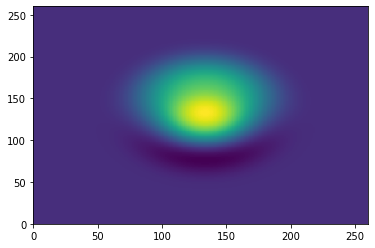

In [19]:
plt.pcolor(c.rhov)
plt.show()